# Step 1: Import Necessary Libraries

In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Step 2: Load the Data

In [345]:
data = pd.read_csv('new-new.csv')
# Check the first few rows to make sure it's loaded correctly
data.head()


,Gender,Age,Date,Paid
0,male,26,1,No
1,female,27,2,Yes
2,female,19,3,No
3,male,38,3,Yes
4,female,40,1,Yes


# Step 2.01: Check for Missing Values

In [347]:
# Check for missing values in the entire dataset
print(data.isnull().sum())


Gender    0
Age       0
Date      0
Paid      0
dtype: int64


# Step 3: Check for Missing Values

In [349]:
# Drop rows where 'Paid' column has NaN values
data = data.dropna(subset=['Paid'])

# Check to ensure there are no missing values in the 'Paid' column
print(data['Paid'].isnull().sum())


0


In [350]:
# Check the first few rows of the dataset
print(data.head())



   Gender  Age  Date Paid
0    male   26     1   No
1  female   27     2  Yes
2  female   19     3   No
3    male   38     3  Yes
4  female   40     1  Yes


In [351]:
# Check the column names to ensure they are what we expect
print(data.columns)

Index(['Gender', 'Age', 'Date', 'Paid'], dtype='object')


In [352]:
# Check the number of rows in the dataset
print(len(data))


30


In [353]:
# Check for missing values in the dataset
print(data.isnull().sum())


Gender    0
Age       0
Date      0
Paid      0
dtype: int64


# Step 4: Convert "Paid" and "Gender" Columns to Numerical

In [355]:
# Convert the 'Paid' column to 1 (Yes) and 0 (No)
data['Paid'] = data['Paid'].map({'Yes': 1, 'No': 0})

# Check to make sure the conversion worked
print(data.head())


   Gender  Age  Date  Paid
0    male   26     1     0
1  female   27     2     1
2  female   19     3     0
3    male   38     3     1
4  female   40     1     1


In [356]:
# Convert the 'Gender' column to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

# Check the updated DataFrame
print(data.head())


   Age  Date  Paid  Gender_male
0   26     1     0         True
1   27     2     1        False
2   19     3     0        False
3   38     3     1         True
4   40     1     1        False


In [357]:
# Convert 'Gender_male' from boolean (True/False) to integer (1/0)
data['Gender_male'] = data['Gender_male'].astype(int)

# Check the updated DataFrame
print(data.head())


   Age  Date  Paid  Gender_male
0   26     1     0            1
1   27     2     1            0
2   19     3     0            0
3   38     3     1            1
4   40     1     1            0


# Step 5: Split the Data for Training and Testing

In [359]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = data[['Age', 'Date', 'Gender_male']]  # Features
y = data['Paid']  # Target

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the splits to confirm
print(X_train.shape, X_test.shape)


(21, 3) (9, 3)


# Step 6: Train the DecisionTreeClassifier Model

In [379]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Create and train the decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)



Accuracy: 88.89%
Confusion Matrix:
[[0 0]
 [1 8]]


# Step 7: Visualize the Confusion Matrix

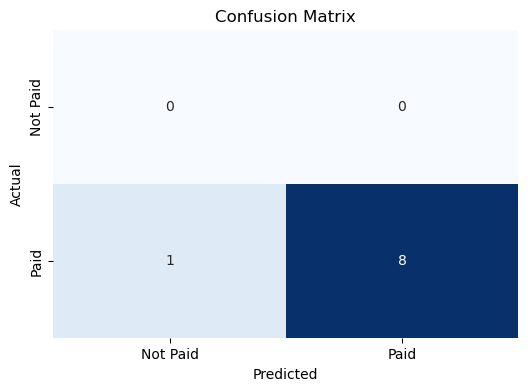

In [382]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)

# Add labels and titles
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Not Paid', 'Paid'])
plt.yticks([0.5, 1.5], ['Not Paid', 'Paid'])

# Show the plot
plt.show()

